In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics
%matplotlib inline


In [2]:
y_score_30_rf = pd.read_csv("plot metric/y_score_30_rf.csv",header = None)
y_score_1y_rf = pd.read_csv("plot metric/y_score_1y_rf.csv",header = None)
y_score_30_linreg = pd.read_csv("plot metric/y_score_30_linreg.csv",header = None)
y_score_1y_linreg = pd.read_csv("plot metric/y_score_1y_linreg.csv",header = None)
y_score_30_simple = pd.read_csv("plot metric/y_score_30_simple.csv")
y_score_1y_simple = pd.read_csv("plot metric/y_score_1y_simple.csv")
y_score_30_vgg = pd.read_csv("plot metric/y_score_30_vgg.csv")
y_score_1y_vgg = pd.read_csv("plot metric/y_score_1y_vgg.csv")

In [3]:
test_1y = pd.read_csv("data_pp_test_1y.csv")
test_30 = pd.read_csv("data_pp_test_30d.csv")
y_test_1y = test_1y['one_year']
y_test_30 = test_30['thirty_days']

# Plot ROC of different models predicting 1 year mortality.

In [20]:
def plot_ROC(fpr, tpr, auc,name='', title = 'ROC curve'):
    sns.set_style('whitegrid')
#     plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='{}: (AUC = {:.3f})'.format(name,auc))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title)
    plt.legend(loc='best')
#     plt.show()
    pass

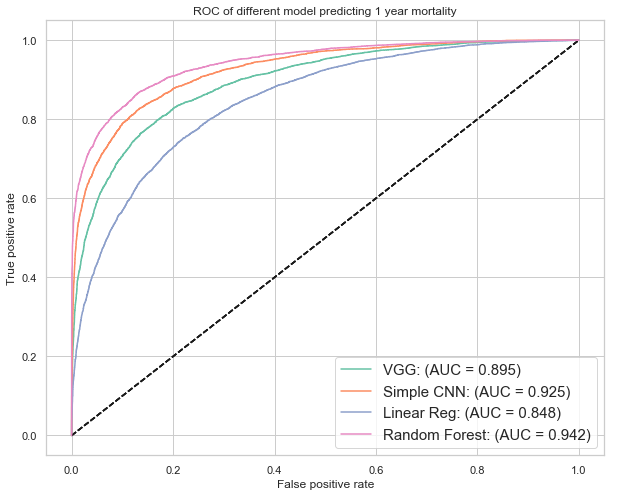

In [21]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_vgg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'VGG')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_simple)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Simple CNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_linreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Linear Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_1y, y_score_1y_rf)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Random Forest',title = 'ROC of different model predicting 1 year mortality')

# Plot ROC of different models predicting 30 day mortality.

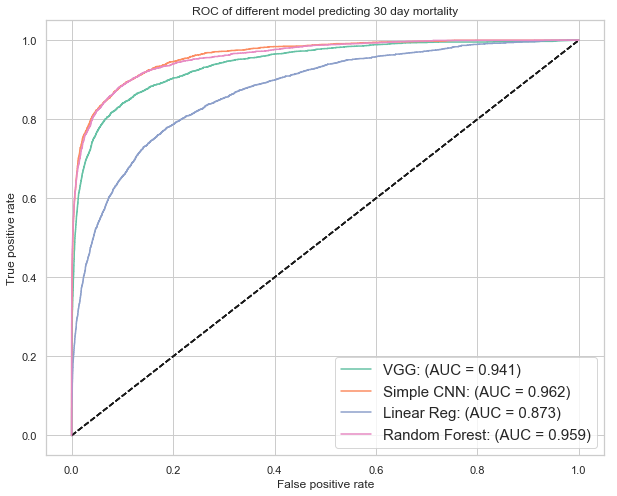

In [22]:
plt.figure(figsize=(10,8))
fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_vgg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'VGG')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_simple)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Simple CNN')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_linreg)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Linear Reg')

fpr, tpr, thresholds = metrics.roc_curve(y_test_30, y_score_30_rf)
auc = metrics.auc(fpr, tpr)
plot_ROC(fpr, tpr, auc,name = 'Random Forest',title = 'ROC of different model predicting 30 day mortality')

# Plot Precision-Recall Curve of different models predicting 1 year mortality.

In [23]:
def plot_PRC(precision, recall, ap, name = '',title= 'Precision-Recall Curve'):
    sns.set_style('whitegrid')
    
#    plt.figure()
    plt.plot(recall, precision, lw=2, label='{}: (AUC = {:.4f})'.format(name,ap))
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(title)
    plt.legend(loc="best")
    return 

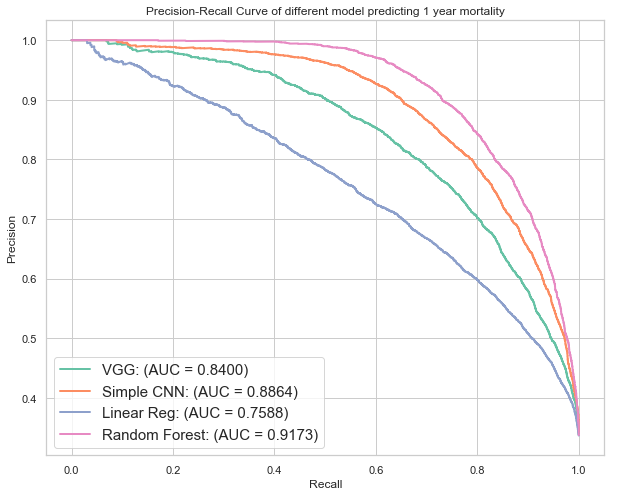

In [27]:
plt.figure(figsize=(10,8))
precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_vgg)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_vgg)
plot_PRC(precision, recall, average_precision,name = 'VGG')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_simple)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_simple)
plot_PRC(precision, recall, average_precision,name = 'Simple CNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_linreg)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_linreg)
plot_PRC(precision, recall, average_precision,name = 'Linear Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_1y, y_score_1y_rf)
average_precision = metrics.average_precision_score(y_test_1y, y_score_1y_rf)
plot_PRC(precision, recall, average_precision,name = 'Random Forest',title = 'Precision-Recall Curve of different model predicting 1 year mortality')

# Plot Precision-Recall Curve of different models predicting 30 day mortality.

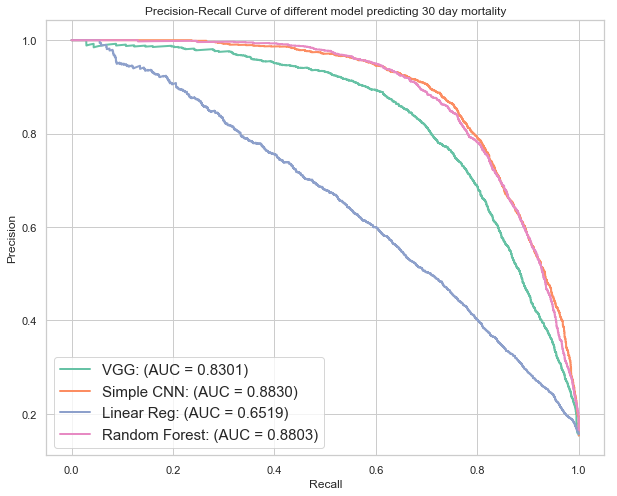

In [28]:
plt.figure(figsize=(10,8))
precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_vgg)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_vgg)
plot_PRC(precision, recall, average_precision,name = 'VGG')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_simple)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_simple)
plot_PRC(precision, recall, average_precision,name = 'Simple CNN')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_linreg)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_linreg)
plot_PRC(precision, recall, average_precision,name = 'Linear Reg')

precision, recall, _ = metrics.precision_recall_curve(y_test_30, y_score_30_rf)
average_precision = metrics.average_precision_score(y_test_30, y_score_30_rf)
plot_PRC(precision, recall, average_precision,name = 'Random Forest',title = 'Precision-Recall Curve of different model predicting 30 day mortality')